In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
passengers = pd.read_csv('./data/titanic_data.csv')

In [3]:
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
# Male and Female survivors. Absolute numbers
passengers.groupby(['Sex','Survived'])[['Survived']].count()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

In [40]:
# Male and Female survivors. % of total number of female and male passengers
# Almost 75% of female passengers survived whereas only 20% male passengers survived
passengers.groupby(['Sex','Survived'])[['Survived']].count()/passengers.groupby('Sex')[['Survived']].count()

Survived
Sex    Survived          
female 0         0.257962
       1         0.742038
male   0         0.811092
       1         0.188908

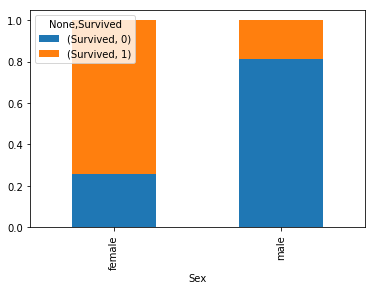

In [85]:
(passengers.groupby(['Sex','Survived'])[['Survived']].count()/passengers.groupby('Sex')[['Survived']].count()).unstack(level=1).plot.bar(stacked=True)

In [82]:
#Passengers in the higher class survived compared to those in lower class cabins
passengers.groupby('Pclass')[['Survived']].sum()/passengers.groupby('Pclass')[['Survived']].count()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


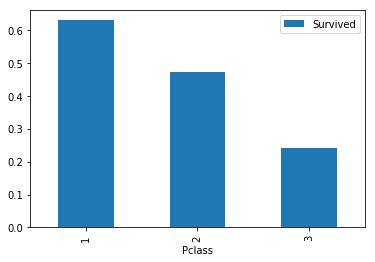

In [81]:
(passengers.groupby('Pclass')[['Survived']].sum()/passengers.groupby('Pclass')[['Survived']].count()).plot.bar()

In [67]:
bins = pd.IntervalIndex.from_tuples([(0,9),(10,24),(25,39),(40,59),(60,99)])
#["0-9","10-24","25-39","40-59","60-99"]
passengers['age_group']= pd.cut(passengers['Age'],bins)

In [68]:
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(10, 24]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(25, 39]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(25, 39]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(25, 39]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(25, 39]"


In [86]:
passengers.groupby(['age_group','Survived'])[['Survived']].count()/passengers.groupby('age_group')[['Survived']].count()

Survived
age_group Survived          
(0, 9]    0         0.387097
          1         0.612903
(10, 24]  0         0.624413
          1         0.375587
(25, 39]  0         0.580000
          1         0.420000
(40, 59]  0         0.612903
          1         0.387097
(60, 99]  0         0.772727
          1         0.227273

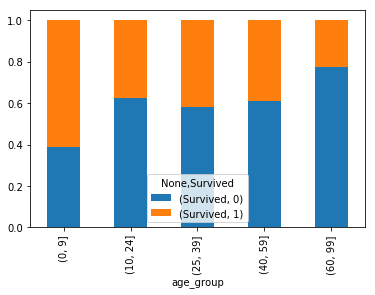

In [87]:
#More proportion of younger children survived than even young adults or adults 
(passengers.groupby(['age_group','Survived'])[['Survived']].count()/passengers.groupby('age_group')[['Survived']].count()).unstack(level=1).plot.bar(stacked=True)

In [91]:
#Female across all age groups had a higher survival rates compared to male passengers; except male kids(<10yr old)
passengers.groupby(['Sex','age_group'])[['Survived']].sum()/passengers.groupby(['Sex','age_group'])[['Survived']].count()

Survived
Sex    age_group          
female (0, 9]     0.633333
       (10, 24]   0.767442
       (25, 39]   0.800000
       (40, 59]   0.750000
       (60, 99]   1.000000
male   (0, 9]     0.593750
       (10, 24]   0.110236
       (25, 39]   0.224242
       (40, 59]   0.187500
       (60, 99]   0.105263